In [53]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          5.1                         
year           2018                        
month          07                          
day            02                          
svn rev        74947                       
language       R                           
version.string R version 3.5.1 (2018-07-02)
nickname       Feather Spray               

In [54]:
# install.packages( "lavaan")
# install.packages( "OpenMx")
# install.packages( "semPlot")
# install.packages( "GGally")
# install.packages( "corrplot")
# install.packages("readxl")
library(lavaan)
library(semPlot)
library(OpenMx)
library(GGally)
library(corrplot) 
library(readxl)

corrplot 0.84 loaded


In [8]:
file_folder <- "D:/XH/Python_Project/notebook/new_proj"
# getwd()
setwd(file_folder)

data <- read_excel('data_sel_1.xlsx')
head(data, n = 5) 

B2r7c1,B2r37c1,B2r31c1,B2r42c1,B1r1c1,B1r5c1,B1r33c1,B1r34c1,B1r35c1,B1r36c1,...,B1r38c1,B2r40c1,B2r8c1,B2r20c1,B1r29c1,B1r43c1,B1r44c1,B1r45c1,B2r46c1,B2r47c1
1,1,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,1
1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
1,1,1,1,1,0,1,1,0,1,...,0,0,0,0,1,1,1,0,1,1
0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [50]:
model = 'B2r7c1 ~ B2r37c1 + B2r31c1 + B2r42c1 
B2r37c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 
B2r31c1 ~ B2r13c1 + B1r16c1 + B1r23c1 + B1r25c1 + B1r38c1 + B2r40c1 
B2r42c1 ~ B2r8c1 + B2r20c1 + B1r29c1 + B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1 
B1r23c1 ~ B1r16c1
B2r13c1 ~ B1r23c1 
B2r21c1 ~ B1r1c1 + B1r34c1 + B1r5c1 + B1r35c1 
B1r34c1 ~ B1r33c1 
B1r35c1 ~ B1r33c1 
B2r8c1 ~ B1r29c1 + B1r43c1 + B1r44c1 
B1r43c1 ~ B1r45c1 
'

In [51]:
fit1 = cfa(model, data = data)
summary(fit1, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE)

lavaan 0.6-2 ended normally after 43 iterations

  Optimization method                           NLMINB
  Number of free parameters                         47

  Number of observations                          1310

  Estimator                                         ML
  Model Fit Test Statistic                    3073.731
  Degrees of freedom                               173
  P-value (Chi-square)                           0.000

Model test baseline model:

  Minimum Function Test Statistic             7274.969
  Degrees of freedom                               209
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.589
  Tucker-Lewis Index (TLI)                       0.504

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -7123.658
  Loglikelihood unrestricted model (H1)      -5586.792

  Number of free parameters                         47
  Akaike (AIC)  

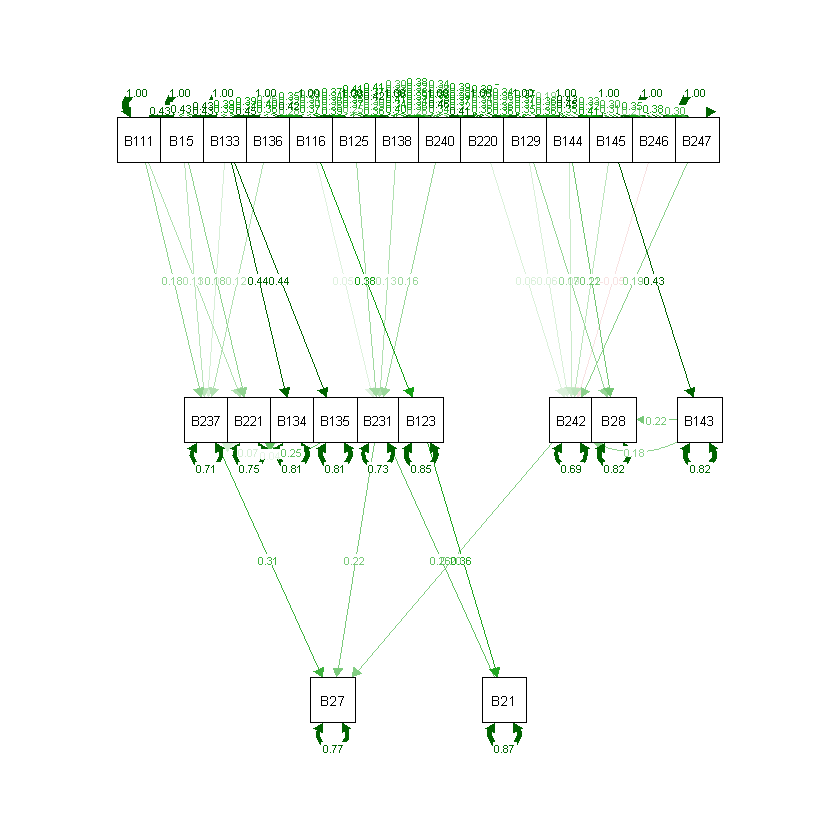

In [52]:
semPaths(fit1, 'std', layout = 'tree2') 

In [28]:
fit2 = cfa(model, data = data)
summary(fit2) 

lavaan 0.6-2 ended normally after 30 iterations

  Optimization method                           NLMINB
  Number of free parameters                         28

  Number of observations                          1310

  Estimator                                         ML
  Model Fit Test Statistic                     669.004
  Degrees of freedom                                66
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard Errors                             Standard

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)
  B2r7c1 ~                                            
    B2r37c1           0.306    0.024   12.653    0.000
    B2r31c1           0.202    0.023    8.850    0.000
    B2r42c1           0.206    0.025    8.222    0.000
  B2r37c1 ~                                           
    B1r1c1            0.172    0

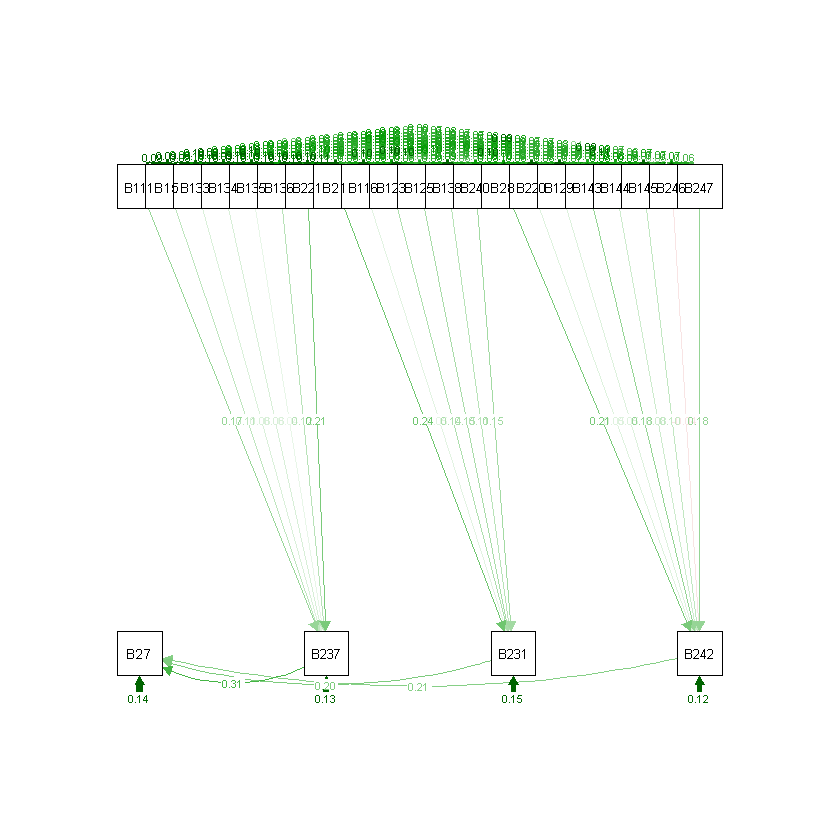

In [29]:
semPaths(fit2, 'std', 'est', curveAdjacent = TRUE, style = "lisrel")

In [32]:
fit <- sem(model, data=data)
summary(fit)

lavaan 0.6-2 ended normally after 30 iterations

  Optimization method                           NLMINB
  Number of free parameters                         28

  Number of observations                          1310

  Estimator                                         ML
  Model Fit Test Statistic                     669.004
  Degrees of freedom                                66
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard Errors                             Standard

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)
  B2r7c1 ~                                            
    B2r37c1           0.306    0.024   12.653    0.000
    B2r31c1           0.202    0.023    8.850    0.000
    B2r42c1           0.206    0.025    8.222    0.000
  B2r37c1 ~                                           
    B1r1c1            0.172    0